Found 9371 images belonging to 4 classes.
Found 2341 images belonging to 4 classes.


c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.0633 - loss: 0.4950 - val_accuracy: 0.0527 - val_loss: 0.2974
Epoch 2/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.0312 - loss: 0.1075 - val_accuracy: 0.2000 - val_loss: 0.2054
Epoch 3/15


c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


292/292 ━━━━━━━━━━━━━━━━━━━━ 218s 747ms/step - accuracy: 0.0581 - loss: 0.3110 - val_accuracy: 0.0531 - val_loss: 0.4638
Epoch 4/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.0312 - loss: -0.1138 - val_accuracy: 0.0000e+00 - val_loss: -0.3754
Epoch 5/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 217s 742ms/step - accuracy: 0.0511 - loss: 0.1909 - val_accuracy: 0.0527 - val_loss: 0.7916
Epoch 6/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.0625 - loss: 2.8817 - val_accuracy: 0.2000 - val_loss: 0.7637
Epoch 7/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 216s 739ms/step - accuracy: 0.0524 - loss: 0.2458 - val_accuracy: 0.0531 - val_loss: 0.6333
Epoch 8/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.0625 - loss: 2.0231 - val_accuracy: 0.0000e+00 - val_loss: -2.9276
Epoch 9/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 231s 791ms/step - accuracy: 0.0549 - loss: 0.2279 - val_accuracy: 0.0531 - val_loss: 0.3698
Epoch 10/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0312 - loss: 0.1

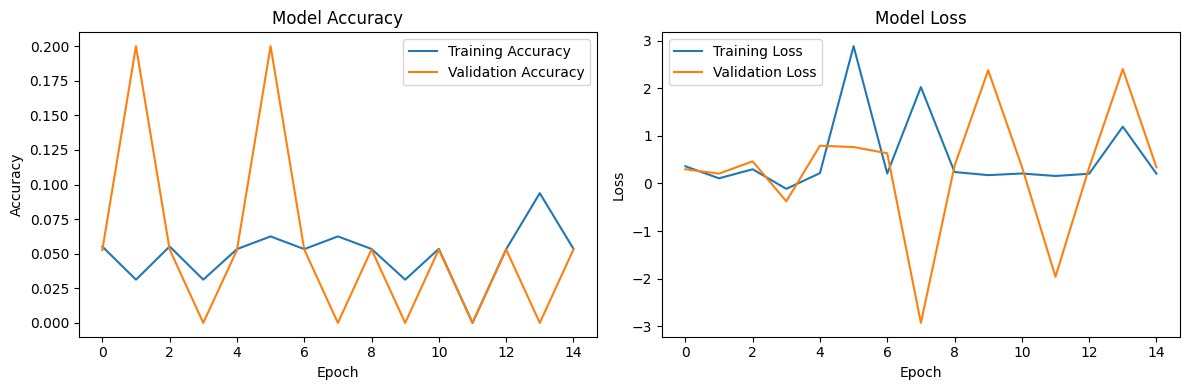

74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 579ms/step


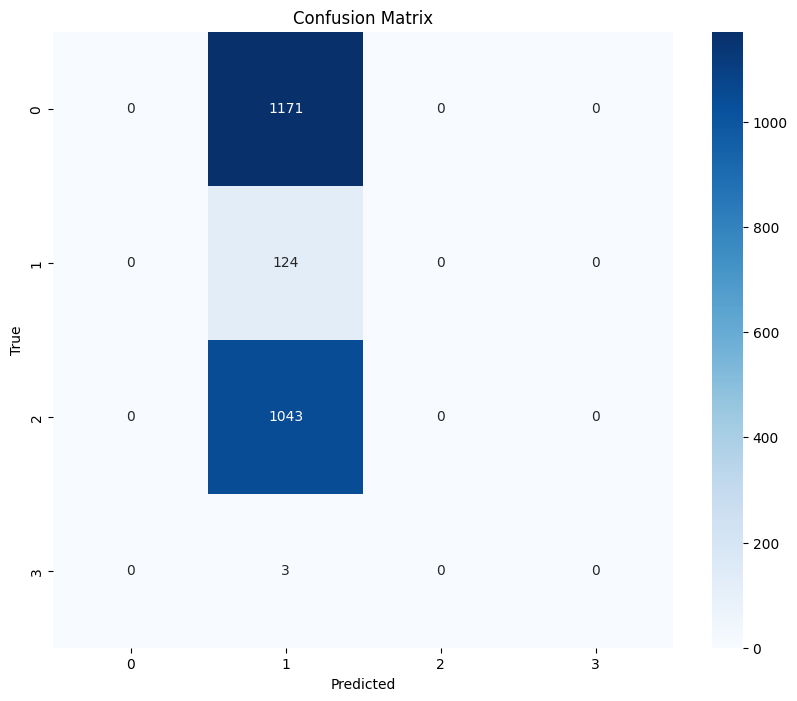

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data paths
data_dir = 'E:/ep/chest_xray'
normal_dir = f'{data_dir}/normal'
pneumonia_dir = f'{data_dir}/pneumonia'

# Image parameters
img_height = 224
img_width = 224
batch_size = 32

# Data augmentation and preprocessing
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and prepare the data
train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build the model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=15,
    validation_data=val_data,
    validation_steps=val_data.samples // batch_size
)

# Visualize the accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the confusion matrix
y_pred = model.predict(val_data)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = val_data.classes

cm = tf.math.confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Model is configured with deterministic seeds.


c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


c:\Users\vikas_vr4up30\anaconda3\envs\myenv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 - 26s - 526ms/step - auc: 0.5206 - loss: 0.5797 - val_auc: 0.5625 - val_loss: 0.8055
Epoch 2/5
50/50 - 25s - 499ms/step - auc: 0.8247 - loss: 0.4488
Epoch 3/5
50/50 - 24s - 475ms/step - auc: 0.9322 - loss: 0.2877 - val_auc: 0.9062 - val_loss: 0.4752
Epoch 4/5
50/50 - 23s - 455ms/step - auc: 0.9495 - loss: 0.2498
Epoch 5/5
50/50 - 23s - 468ms/step - auc: 0.9637 - loss: 0.2131 - val_auc: 0.8672 - val_loss: 0.5186
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


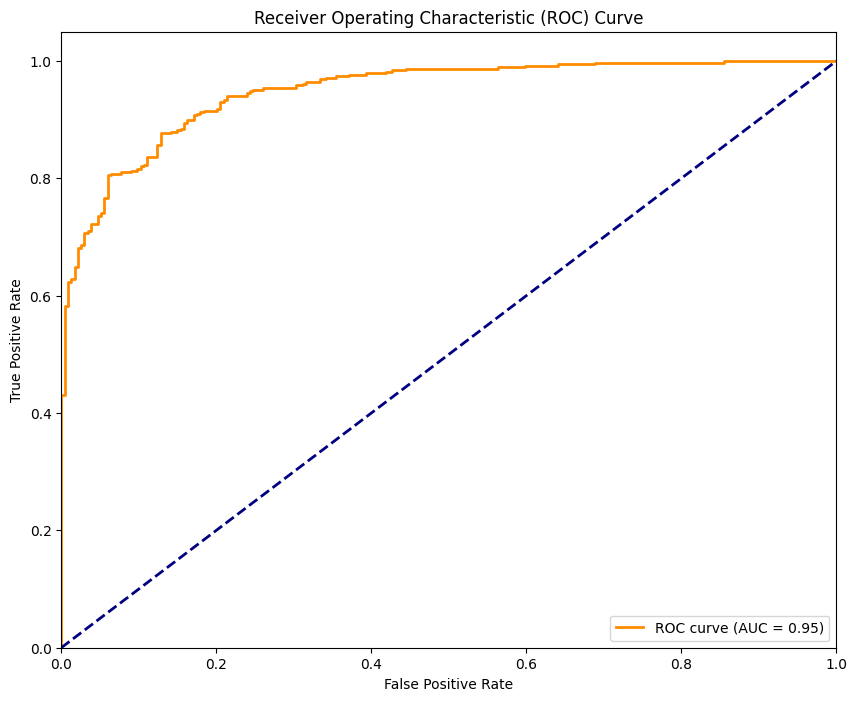

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       234
           1       0.90      0.90      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624

AUC Score: 0.9484


In [3]:
# Import necessary libraries
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.metrics import AUC

# Set seed value for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Set file paths to image files
project_path = "E:/lol"
train_path = project_path + "/chest_xray/train/"
val_path = project_path + "/chest_xray/val/"
test_path = project_path + "/chest_xray/test/"

# Set up hyperparameters
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 5  # Changed to 5 epochs as per instructions
hyper_channels = 1
hyper_mode = 'grayscale'

# Generate batches of image data with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

train_generator = train_datagen.flow_from_directory(
    directory=train_path, 
    target_size=(hyper_dimension, hyper_dimension),
    batch_size=hyper_batch_size, 
    color_mode=hyper_mode,
    class_mode='binary', 
    seed=seed_value
)

val_generator = val_datagen.flow_from_directory(
    directory=val_path, 
    target_size=(hyper_dimension, hyper_dimension),
    batch_size=hyper_batch_size, 
    class_mode='binary',
    color_mode=hyper_mode,
    shuffle=False,
    seed=seed_value
)

test_generator = test_datagen.flow_from_directory(
    directory=test_path, 
    target_size=(hyper_dimension, hyper_dimension),
    batch_size=hyper_batch_size, 
    class_mode='binary',
    color_mode=hyper_mode,
    shuffle=False,
    seed=seed_value
)

test_generator.reset()

# Build the CNN model
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

print("Model is configured with deterministic seeds.")

# Train the model
cnn_model = cnn.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=hyper_epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=2
)

# Evaluate the model on test data
y_pred = cnn.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Calculate and print AUC score
auc_score = roc_auc_score(y_true, y_pred)
print(f"AUC Score: {auc_score:.4f}")





In [5]:
# Save the model weights
weights_save_path = 'cnn_model_weights.weights.h5'
cnn.save_weights(weights_save_path)
print(f"Model weights saved to {weights_save_path}")

# Save the entire model in Keras format
model_save_path = 'cnn_model.keras'
cnn.save(model_save_path)
print(f"Full model saved to {model_save_path}")

# Optionally, save the model in HDF5 format with a warning
import warnings

hdf5_save_path = 'cnn_model.h5'
with warnings.catch_warnings():
    warnings.simplefilter("always")
    warnings.warn("Saving in HDF5 format is considered legacy. Consider using the native Keras format instead.", UserWarning)
    cnn.save(hdf5_save_path, save_format='h5')
print(f"Model saved in HDF5 format to {hdf5_save_path}")



C:\Users\vikas_vr4up30\AppData\Local\Temp\ipykernel_3700\298297016.py:17: UserWarning: Saving in HDF5 format is considered legacy. Consider using the native Keras format instead.
  warnings.warn("Saving in HDF5 format is considered legacy. Consider using the native Keras format instead.", UserWarning)


Model weights saved to cnn_model_weights.weights.h5
Full model saved to cnn_model.keras
Model saved in HDF5 format to cnn_model.h5
